In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('/content/house-test.csv')
test = pd.read_csv('/content/house-train.csv')

In [4]:
test.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,3,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,12.247694
1,1,2,20,3,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,12.109011
2,2,3,60,3,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,12.317167
3,3,4,70,3,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,11.849398
4,4,5,60,3,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,12.429216


In [16]:
#train = train.drop(["Unnamed: 0", "Id"], axis = 1)
#test = test.drop(["Unnamed: 0", "Id"], axis = 1)


KeyError: ignored

In [10]:
train_data = train.values
Y = train_data[:, -1].reshape(train_data.shape[0], 1)
X = train_data[:, :-1]

In [11]:
test_data = test.values
Y_test = test_data[:, -1].reshape(test_data.shape[0], 1)
X_test = test_data[:, :-1]

In [12]:
print("Shape of X_train :", X.shape)
print("Shape of Y_train :", Y.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of Y_test :", Y_test.shape)

Shape of X_train : (258, 69)
Shape of Y_train : (258, 1)
Shape of X_test : (1200, 69)
Shape of Y_test : (1200, 1)


In [13]:
X = np.vstack((np.ones((X.shape[0], )), X.T)).T
X_test = np.vstack((np.ones((X_test.shape[0], )), X_test.T)).T

In [23]:
def model(X, Y, learning_rate, iteration):
    m = Y.size
    theta = np.zeros((X.shape[1], 1))
    cost_list = []
    for i in range(iteration):
        y_pred = np.dot(X, theta)
        cost = (1/(2*m))*np.sum(np.square(y_pred - Y))
        d_theta = (1/m)*np.dot(X.T, y_pred - Y)
        theta = theta - learning_rate*d_theta
        cost_list.append(cost)

        if(i%(iteration/10) == 0):
            print("Cost is :", cost)
    return theta, cost_list

In [32]:
iteration = 10000
learning_rate = 0.000000005
theta, cost_list = model(X, Y, learning_rate = learning_rate, iteration =
iteration)

Cost is : 72.33487433639091
Cost is : 0.026532260697102898
Cost is : 0.016451820882816014
Cost is : 0.015471185782772033
Cost is : 0.01527666026875243
Cost is : 0.015177220448777411
Cost is : 0.015099097085779811
Cost is : 0.015031985431097872
Cost is : 0.014973184587087929
Cost is : 0.01492121430224936


SyntaxError: ignored

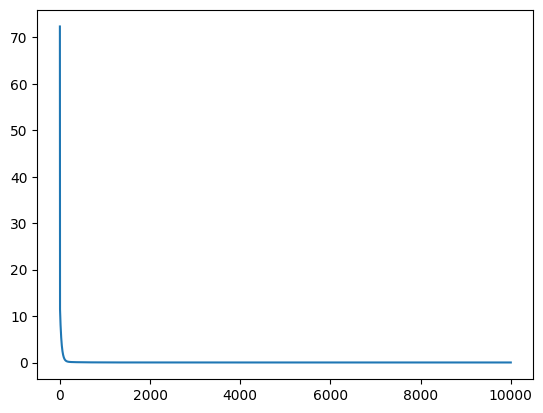

In [25]:
rng = np.arange(0, iteration)
plt.plot(rng, cost_list)
plt.show()

In [26]:
y_pred = np.dot(X_test, theta)
error = (1/X_test.shape[0])*np.sum(np.abs(y_pred - Y_test))

In [31]:
print("Test error is :", error*100, "%")
print("Test Accuracy is :", (1- error)*100, "%")

Test error is : 13.426218880913176 %
Test Accuracy is : 86.57378111908682 %
